In [1]:
import numpy as np

In [2]:
def AND(x,y):
    return 0 if np.sum(np.array([x,y]) * np.array([0.5, 0.5])) - 0.7 <= 0 else 1 

In [3]:
AND(0,0), AND(0,1), AND(1,0), AND(1,1)

(0, 0, 0, 1)

In [8]:
x = np.array([3,4])
y = np.array([0.5, 0.5])
np.transpose(x) @ y

3.5

In [9]:
"""Only the linear combination can be expressed by the perceptron but fo the non-linear cases, the perceptron fails here!!!!"""

'Only the linear combination can be expressed by the perceptron but fo the non-linear cases, the perceptron fails here!!!!'

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)


In [12]:
import matplotlib.pyplot as plt

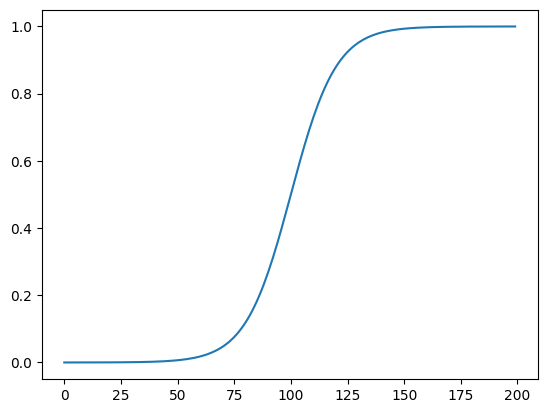

In [13]:
plt.plot(y)
plt.show()

In [14]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [23]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3
    return y

In [24]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # sigmoid, identity_function함수는 앞서 정의됨

[0.31682708 0.69627909]


In [25]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from nltk.corpus import wordnet

In [3]:
wordnet.synsets('car')

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/nirmal/nltk_data'
    - '/home/nirmal/miniconda3/envs/slr/nltk_data'
    - '/home/nirmal/miniconda3/envs/slr/share/nltk_data'
    - '/home/nirmal/miniconda3/envs/slr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/nirmal/nltk_data...


True

In [5]:
nltk.download('omw-1.4')  # Optional, enhances WordNet

[nltk_data] Downloading package omw-1.4 to /home/nirmal/nltk_data...


True

In [7]:
from nltk.corpus import wordnet
synsets = wordnet.synsets('car')

In [8]:
synsets

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [9]:
wordnet.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [13]:
wordnet.synset('car').path_similarity(wordnet.synset('dog'))

ValueError: not enough values to unpack (expected 3, got 1)

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph(format='png', engine='dot')
dot.attr(rankdir='LR', size='10')

# Add top-level modules
dot.node('RecognitionNetwork', 'RecognitionNetwork', shape='box', style='filled', fillcolor='lightblue')
dot.node('S3D_backbone', 'S3D_backbone', shape='box', style='filled', fillcolor='lightgreen')
dot.node('VisualHead', 'VisualHead', shape='box', style='filled', fillcolor='lightyellow')
dot.node('CTCLoss', 'CTCLoss', shape='box', style='filled', fillcolor='lightcoral')

# Add submodules in S3D_backbone
dot.node('SepConv3d', 'SepConv3d', shape='ellipse')
dot.node('MaxPool3d', 'MaxPool3d', shape='ellipse')
dot.node('Mixed_Layers', 'Mixed Layers\n(Mixed_3b, Mixed_4b, etc.)', shape='ellipse')

# Add submodules in VisualHead
dot.node('fc1', 'fc1 (Fully Connected)', shape='ellipse')
dot.node('PositionalEncoding', 'PositionalEncoding', shape='ellipse')
dot.node('PositionwiseFeedForward', 'PositionwiseFeedForward', shape='ellipse')
dot.node('gloss_output_layer', 'gloss_output_layer', shape='ellipse')

# Add connections for RecognitionNetwork
dot.edge('RecognitionNetwork', 'S3D_backbone')
dot.edge('RecognitionNetwork', 'VisualHead')
dot.edge('RecognitionNetwork', 'CTCLoss')

# Add connections for S3D_backbone
dot.edge('S3D_backbone', 'SepConv3d')
dot.edge('S3D_backbone', 'MaxPool3d')
dot.edge('S3D_backbone', 'Mixed_Layers')

# Add connections for VisualHead
dot.edge('VisualHead', 'fc1')
dot.edge('VisualHead', 'PositionalEncoding')
dot.edge('VisualHead', 'PositionwiseFeedForward')
dot.edge('VisualHead', 'gloss_output_layer')

# Render the graph and display the image
output_path = 'tr'
dot.render(output_path, format='png', cleanup=True)

output_path + '.png'


'tr.png'

In [4]:
from graphviz import Digraph

# Initialize the graph
dot = Digraph(format='png', engine='dot')
dot.attr(rankdir='TB', size='10')  # TB: Top-to-bottom hierarchy

# Root node
dot.node('SignLanguageModel', 'SignLanguageModel', shape='box', style='filled', fillcolor='lightblue')

# Recognition Network
dot.node('RecognitionNetwork', 'RecognitionNetwork', shape='box', style='filled', fillcolor='lightgreen')
dot.edge('SignLanguageModel', 'RecognitionNetwork')

# S3D Backbone
dot.node('S3D_backbone', 'S3D_backbone\n(Input: Video, Output: Features)', shape='box', style='filled', fillcolor='lightyellow')
dot.edge('RecognitionNetwork', 'S3D_backbone')

# Base (Sequential)
dot.node('base', 'base (Sequential)', shape='box', style='dashed')
dot.edge('S3D_backbone', 'base')

# Individual layers in Sequential
dot.node('SepConv3d_1', 'SepConv3d\nKernel: (1,7,7)\nStride: (1,2,2)\nPadding: (0,3,3)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('MaxPool3d_1', 'MaxPool3d\nKernel: (1,3,3)\nStride: (1,2,2)\nPadding: (0,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('BasicConv3d', 'BasicConv3d\nKernel: (1,1,1)\nStride: (1,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('SepConv3d_2', 'SepConv3d\nKernel: (1,3,3)\nStride: (1,1,1)\nPadding: (0,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('MaxPool3d_2', 'MaxPool3d\nKernel: (1,3,3)\nStride: (1,2,2)\nPadding: (0,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')

# Mixed layers
dot.node('Mixed_3b', 'Mixed_3b\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_3c', 'Mixed_3c\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4b', 'Mixed_4b\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4c', 'Mixed_4c\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4d', 'Mixed_4d\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4e', 'Mixed_4e\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4f', 'Mixed_4f\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')

# Connecting layers inside base (Sequential)
dot.edge('base', 'SepConv3d_1')
dot.edge('SepConv3d_1', 'MaxPool3d_1')
dot.edge('MaxPool3d_1', 'BasicConv3d')
dot.edge('BasicConv3d', 'SepConv3d_2')
dot.edge('SepConv3d_2', 'MaxPool3d_2')
dot.edge('MaxPool3d_2', 'Mixed_3b')
dot.edge('Mixed_3b', 'Mixed_3c')
dot.edge('Mixed_3c', 'Mixed_4b')
dot.edge('Mixed_4b', 'Mixed_4c')
dot.edge('Mixed_4c', 'Mixed_4d')
dot.edge('Mixed_4d', 'Mixed_4e')
dot.edge('Mixed_4e', 'Mixed_4f')

# Save and render the graph
output_path = 'new'
dot.render(output_path, format='png', cleanup=True)

print(f"Graph generated and saved to {output_path}.png")


Graph generated and saved to new.png


In [5]:
pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 5.8 MB/s eta 0:00:0000:0100:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45289 sha256=0aeaf7a534cd66795867e02222db75c979561806da7beec68b1c8e4ed0cfe4db
  Stored in directory: /home/nirmal/.cache/pip/wheels/3c/b6/e2/5fadaf4aa63fac5b079d4f633e9d96b29a67ee4fae816806f3
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


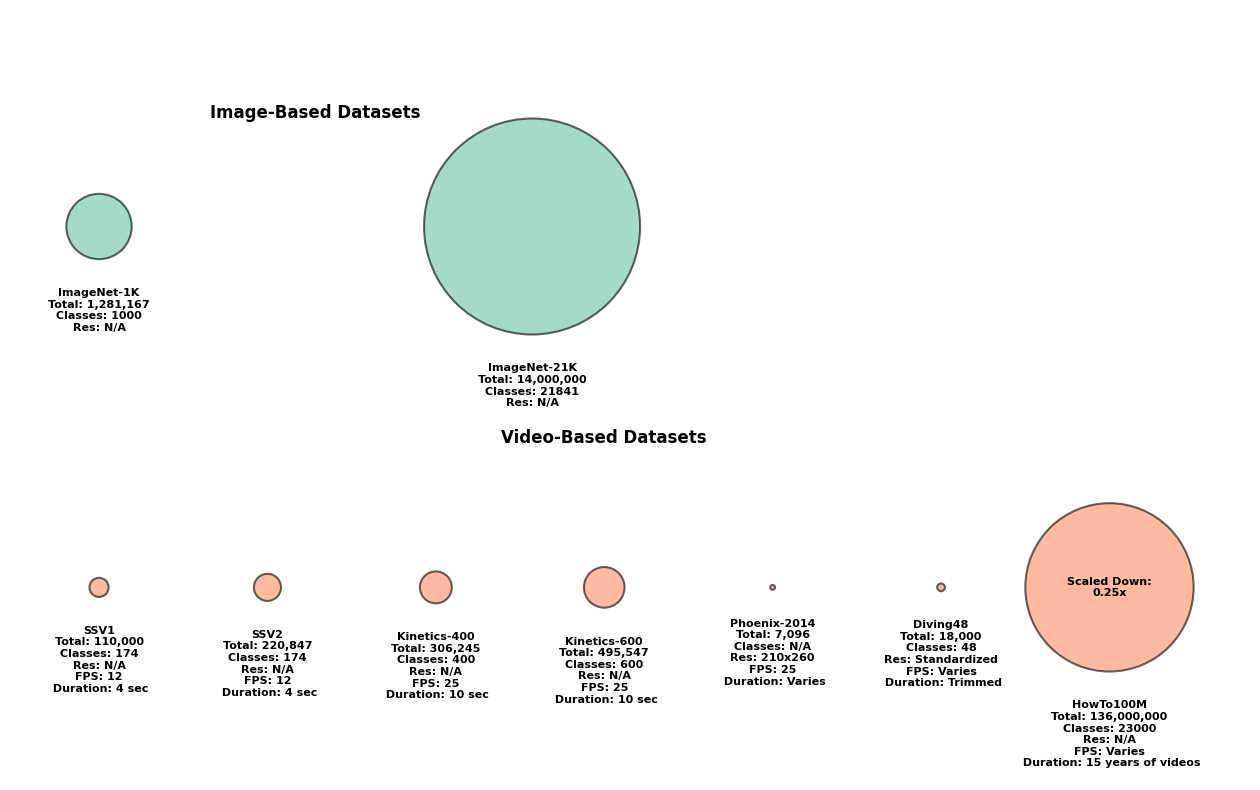

'Bubble_Chart.png'

In [34]:
# Final Adjustments for Bubble Chart with Proper Layout and Spacing

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# Dataset Information
image_datasets = {
    "ImageNet-1K": {"total": 1281167, "classes": 1000},
    "ImageNet-21K": {"total": 14000000, "classes": 21841},
}

video_datasets = {
    "SSV1": {"total": 110000, "classes": 174, "fps": 12, "duration": "4 sec"},
    "SSV2": {"total": 220847, "classes": 174, "fps": 12, "duration": "4 sec"},
    "Kinetics-400": {"total": 306245, "classes": 400, "fps": 25, "duration": "10 sec"},
    "Kinetics-600": {"total": 495547, "classes": 600, "fps": 25, "duration": "10 sec"},
    "Phoenix-2014": {"total": 7096, "classes": "N/A", "fps": 25, "duration": "Varies", "Res": "210x260"},
    "Diving48": {"total": 18000, "classes": 48, "fps": "Varies", "duration": "Trimmed", "Res": "Standardized"},
    "HowTo100M": {"total": 136000000, "classes": 23000, "fps": "Varies", "duration": "15 years of videos", "Res": "N/A"},
}

# Function to draw a clean bubble with description below
def draw_bubble(ax, x, y, dataset, details, radius, color):
    # Scale down large bubbles explicitly
    scaling_factor = 1
    if dataset == "HowTo100M":
        scaling_factor = 0.25  # Scale down factor for large bubble
        radius *= scaling_factor

    # Draw bubble
    circle = Circle((x, y), radius, edgecolor="black", lw=1.5, facecolor=color, alpha=0.6)
    ax.add_patch(circle)

    # Add scaling info inside the bubble for large datasets
    if dataset == "HowTo100M":
        ax.text(x, y, f"Scaled Down:\n{scaling_factor}x", fontsize=8, ha="center", va="center", weight="bold", color="black")

    # Add dataset description below
    label = f"{dataset}\nTotal: {details['total']:,}\nClasses: {details['classes']}\nRes: {details.get('Res', 'N/A')}"
    if "fps" in details:
        label += f"\nFPS: {details['fps']}\n Duration: {details['duration']}"

    ax.text(x, y - radius - 0.4, label, fontsize=8, ha="center", va="top", weight="bold")

# Initialize Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot Image-Based Datasets (Top Row)
x_positions = np.linspace(2, 8, len(image_datasets))  # Spread across the top
y_image = 8
for i, (dataset, details) in enumerate(image_datasets.items()):
    radius = np.sqrt(details["total"]) * 0.0004  # Proportional scaling
    draw_bubble(ax, x_positions[i], y_image, dataset, details, radius, color="#66c2a5")

# Plot Video-Based Datasets (Bottom Row)
x_positions = np.linspace(2, 16, len(video_datasets))  # Full-width spacing for videos
y_video = 3
for i, (dataset, details) in enumerate(video_datasets.items()):
    radius = np.sqrt(details["total"]) * 0.0004  # Proportional scaling
    draw_bubble(ax, x_positions[i], y_video, dataset, details, radius, color="#fc8d62")

# Add Labels for Sections
ax.text(5, 9.5, "Image-Based Datasets", fontsize=12, weight="bold", ha="center")
ax.text(9, 5, "Video-Based Datasets", fontsize=12, weight="bold", ha="center")

# Adjust Layout
ax.axis("equal")  # Ensure circles look like circles
ax.axis("off")    # Hide axes for a clean look

# Save and Show
output_file = "Bubble_Chart.png"
plt.savefig(output_file, dpi=300, bbox_inches="tight")
plt.show()

output_file

In [1]:
import numpy as np

In [2]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [3]:
x = np.arange(10)

In [4]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x[2:-2]

array([2, 3, 4, 5, 6, 7])

In [6]:
5//2

2

In [9]:
402%2

0

In [19]:
frame_idx = [5,6,7,8,9]
valid_len = 5

In [20]:
assert len(frame_idx) == valid_len, (frame_idx, valid_len)

In [21]:
np.random.randint(25,50)

41

In [28]:
sorted(np.random.permutation(np.arange(10))[:6])

[1, 2, 4, 6, 8, 9]

In [29]:
import pathlib

pathlib.Path('Nirmal')

PosixPath('Nirmal')

In [1]:
import sys
import pathlib

In [2]:
sys.path

['/home/nirmal/miniconda3/envs/slr/lib/python310.zip',
 '/home/nirmal/miniconda3/envs/slr/lib/python3.10',
 '/home/nirmal/miniconda3/envs/slr/lib/python3.10/lib-dynload',
 '',
 '/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages']